In [1]:
pip install pandas prince

   ---------------------------------------- 415.8/415.8 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 658.1/658.1 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 174.1/174.1 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Install prince for MCA (if needed)
# !pip install prince
import prince

# Load sample data (you'll need the actual McDonald's data from R)
# Replace this with your McDonald's dataset as used in R
mcdonalds = pd.read_csv("C:/ME/FeynnLabsInternship/Project1/mcdonalds_dataset/mcdonalds.csv")


# Preview the dataset
print(mcdonalds.head())



  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [15]:
# Convert "Yes"/"No" responses to 1/0
MD_x = (mcdonalds == "Yes").astype(int)

# Display column means (just like in R)
col_means = MD_x.mean(axis=0)
print("Column Means:\n", col_means.round(4))


Column Means:
 yummy             0.5526
convenient        0.9078
spicy             0.0936
fattening         0.8672
greasy            0.5265
fast              0.9002
cheap             0.5988
tasty             0.6442
expensive         0.3579
healthy           0.1989
disgusting        0.2429
Like              0.0000
Age               0.0000
VisitFrequency    0.0000
Gender            0.0000
dtype: float64


In [17]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming MD_x is the binary version of the McDonald's dataset (with "Yes" as 1 and "No" as 0)
# Replace this with your actual data after converting "Yes"/"No" to 1/0
MD_x = mcdonalds.iloc[:, 0:11].apply(lambda x: (x == 'Yes').astype(int))

# Apply PCA
pca = PCA(n_components=11)  # There are 11 binary variables, so we'll calculate 11 components
MD_pca = pca.fit(MD_x)

# Summary of PCA: Explained Variance Ratio (equivalent to R's summary(MD.pca))
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Print the results similar to the R output
print("Explained Variance Ratio per component:")
for i, ev in enumerate(explained_variance_ratio, 1):
    print(f"PC{i}: {ev:.4f}")

print("\nCumulative Proportion of Variance:")
for i, cv in enumerate(cumulative_variance, 1):
    print(f"PC{i}: {cv:.4f}")

# You can also view the standard deviation (square root of the eigenvalues)
std_dev = pca.singular_values_ / (MD_x.shape[0] ** 0.5)  # similar to standard deviation in R
print("\nStandard Deviations of each PC:")
for i, sd in enumerate(std_dev, 1):
    print(f"PC{i}: {sd:.4f}")


Explained Variance Ratio per component:
PC1: 0.2994
PC2: 0.1928
PC3: 0.1330
PC4: 0.0831
PC5: 0.0595
PC6: 0.0503
PC7: 0.0438
PC8: 0.0395
PC9: 0.0368
PC10: 0.0324
PC11: 0.0293

Cumulative Proportion of Variance:
PC1: 0.2994
PC2: 0.4922
PC3: 0.6253
PC4: 0.7084
PC5: 0.7679
PC6: 0.8182
PC7: 0.8620
PC8: 0.9016
PC9: 0.9383
PC10: 0.9707
PC11: 1.0000

Standard Deviations of each PC:
PC1: 0.7568
PC2: 0.6072
PC3: 0.5044
PC4: 0.3987
PC5: 0.3373
PC6: 0.3102
PC7: 0.2896
PC8: 0.2750
PC9: 0.2652
PC10: 0.2488
PC11: 0.2368


In [18]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming MD_x is already defined (the binary version of the McDonald's dataset)
MD_x = mcdonalds.iloc[:, 0:11].apply(lambda x: (x == 'Yes').astype(int))

# Apply PCA
pca = PCA(n_components=11)  # 11 components since we have 11 columns
MD_pca = pca.fit(MD_x)

# Standard Deviations
std_devs = pca.singular_values_ / (MD_x.shape[0] ** 0.5)  # Equivalent to R's standard deviations
print("Standard deviations (1, .., p=11):")
for i, sd in enumerate(std_devs, 1):
    print(f"[{i}] {sd:.2f}", end=" ")
print()  # For new line

# Rotation Matrix (Principal Components)
rotation_matrix = pca.components_.T  # Transpose to match R output format
rotation_df = pd.DataFrame(rotation_matrix, columns=[f'PC{i+1}' for i in range(rotation_matrix.shape[1])],
                            index=mcdonalds.columns[:11])  # Use the first 11 column names
print("\nRotation (n x k) = (11 x 11):")
print(rotation_df)

# Optional: If you want to print in a formatted way similar to R output
for i in range(rotation_matrix.shape[1]):
    print(f"PC{i+1}", rotation_matrix[:, i])


Standard deviations (1, .., p=11):
[1] 0.76 [2] 0.61 [3] 0.50 [4] 0.40 [5] 0.34 [6] 0.31 [7] 0.29 [8] 0.28 [9] 0.27 [10] 0.25 [11] 0.24 

Rotation (n x k) = (11 x 11):
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy       0.476933 -0.363790  0.304444  0.055162  0.307535 -0.170738   
convenient  0.155332 -0.016414  0.062515 -0.142425 -0.277608  0.347830   
spicy       0.006356 -0.018809  0.037019  0.197619 -0.070620  0.355087   
fattening  -0.116232  0.034094  0.322359 -0.354139  0.073405  0.406515   
greasy     -0.304443  0.063839  0.802373  0.253960 -0.361399 -0.209347   
fast        0.108493  0.086972  0.064642 -0.097363 -0.107930  0.594632   
cheap       0.337186  0.610633  0.149310  0.118958  0.128973  0.103241   
tasty       0.471514 -0.307318  0.287265 -0.002547  0.210899  0.076914   
expensive  -0.329042 -0.601286 -0.024397  0.067816  0.003125  0.261342   
healthy     0.213711 -0.076593 -0.192051  0.763488 -0.287846  0.178226   
disgusting -0.3747

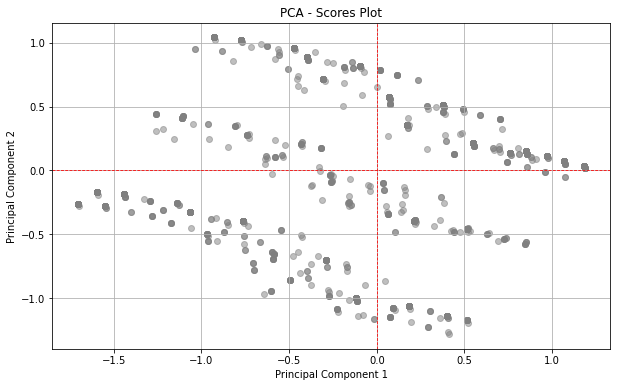

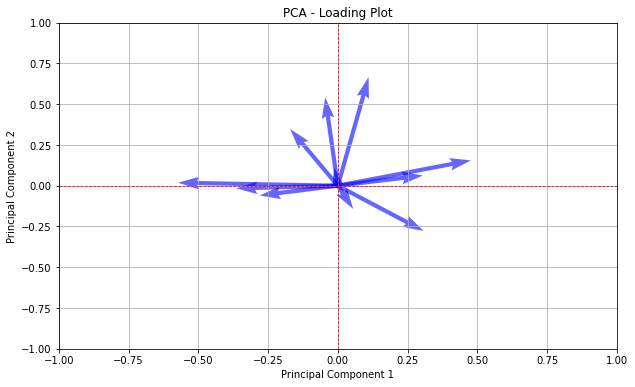

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD_pca is the PCA object from the previous steps
MD_scores = pca.transform(MD_x)  # Get the PCA scores (projected data)

# Plot PCA scores
plt.figure(figsize=(10, 6))
plt.scatter(MD_scores[:, 0], MD_scores[:, 1], color='grey', alpha=0.5)  # PC1 vs PC2
plt.title('PCA - Scores Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.axvline(0, color='red', linestyle='--', linewidth=0.8)
plt.grid()
plt.show()

# Plotting the PCA loadings (projection of the original features)
plt.figure(figsize=(10, 6))
for i in range(rotation_matrix.shape[1]):
    plt.quiver(0, 0, rotation_matrix[:, i][0], rotation_matrix[:, i][1],
               angles='xy', scale_units='xy', scale=1, color='b', alpha=0.6)
    
# Adjust the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('PCA - Loading Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.axvline(0, color='red', linestyle='--', linewidth=0.8)
plt.grid()
plt.show()


Inertia values for each number of clusters:
Clusters: 2, Inertia: 2145.503726917162
Clusters: 3, Inertia: 1818.7176591653842
Clusters: 4, Inertia: 1602.9860148663254
Clusters: 5, Inertia: 1435.3247856933986
Clusters: 6, Inertia: 1332.150483061453
Clusters: 7, Inertia: 1249.2338900799607
Clusters: 8, Inertia: 1191.5809481928056


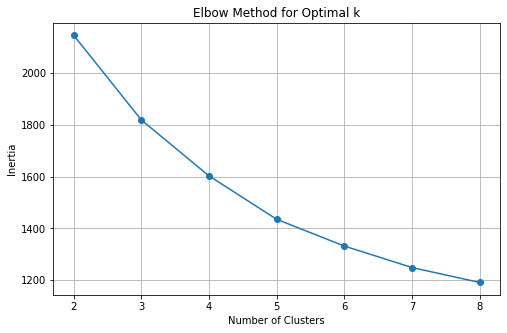

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming MD_x is the binary matrix created from the McDonald's dataset
# Initialize variables for storing cluster models and their inertia values
kmeans_models = {}
inertia_values = []

# Set random seed for reproducibility
np.random.seed(1234)

# Loop through the desired number of clusters (from 2 to 8)
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)  # Fit the model
    kmeans_models[n_clusters] = kmeans  # Store the model
    inertia_values.append(kmeans.inertia_)  # Store inertia for evaluating clusters

# Optionally, relabel the clusters (if needed)
# This part is specific to how you want to label your clusters.
# Here, we're using the labels directly from KMeans.
labels = {}
for n_clusters in range(2, 9):
    labels[n_clusters] = kmeans_models[n_clusters].labels_

# Print the inertia values for evaluation
print("Inertia values for each number of clusters:")
for n, inertia in zip(range(2, 9), inertia_values):
    print(f"Clusters: {n}, Inertia: {inertia}")

# Optionally plot the elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 9))
plt.grid()
plt.show()


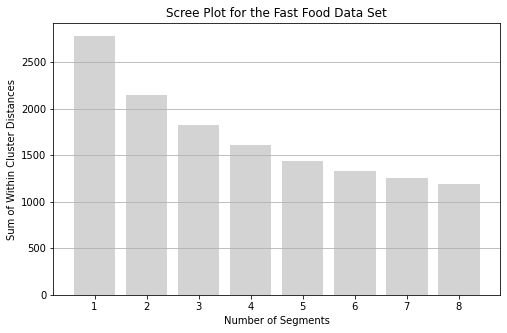

In [22]:
# We compare different solutions using Scree plot.
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming MD_x is the binary matrix created from the McDonald's dataset
# Initialize variables for storing cluster models and their inertia values
inertia_values = []

# Set random seed for reproducibility
np.random.seed(1234)

# Loop through the desired number of clusters (from 1 to 8)
for n_clusters in range(1, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)  # Fit the model
    inertia_values.append(kmeans.inertia_)  # Store inertia for evaluating clusters

# Create a Scree Plot (Bar Chart)
plt.figure(figsize=(8, 5))
plt.bar(range(1, 9), inertia_values, color='lightgrey')
plt.title('Scree Plot for the Fast Food Data Set')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within Cluster Distances')
plt.xticks(range(1, 9))
plt.grid(axis='y')
plt.show()


C:\Users\91897\AppData\Local\Temp\ipykernel_35440\3450770659.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ari_scores, labels=segment_range, patch_artist=True, boxprops=dict(facecolor='lightgrey'))


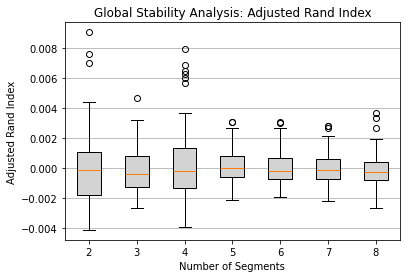

In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Sample data (replace this with your actual McDonald's dataset)
# MD_x = pd.read_csv('path_to_your_mcdonalds_data.csv')  # Load your dataset

# Parameters
np.random.seed(1234)
segment_range = range(2, 9)  # 2 to 8
n_bootstraps = 100
n_reps = 10

# Store ARI scores
ari_scores = []

for n_segments in segment_range:
    original_kmeans = KMeans(n_clusters=n_segments, n_init=n_reps, random_state=1234)
    original_kmeans.fit(MD_x)
    original_labels = original_kmeans.labels_

    # Calculate ARI for bootstrap samples
    boot_aris = []
    for _ in range(n_bootstraps):
        bootstrap_sample = MD_x.sample(frac=1, replace=True)
        kmeans = KMeans(n_clusters=n_segments, n_init=n_reps, random_state=1234)
        kmeans.fit(bootstrap_sample)
        boot_aris.append(adjusted_rand_score(original_labels, kmeans.labels_))
    
    ari_scores.append(boot_aris)

# Plotting
plt.boxplot(ari_scores, labels=segment_range, patch_artist=True, boxprops=dict(facecolor='lightgrey'))
plt.title('Global Stability Analysis: Adjusted Rand Index')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.grid(axis='y')
plt.show()


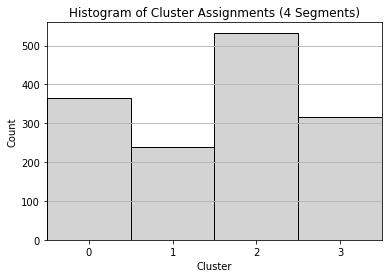

In [25]:


# Assuming MD_km28_4 contains the labels for the clusters for 4 segments
# Replace with the actual cluster labels after fitting KMeans
MD_km28_4 = KMeans(n_clusters=4, n_init=n_reps, random_state=1234).fit(MD_x).labels_

# Create a DataFrame for convenience
MD_x_df = pd.DataFrame(MD_x, columns=[f'Feature {i+1}' for i in range(MD_x.shape[1])])
MD_x_df['Cluster'] = MD_km28_4

# Plot histogram of the cluster sizes
plt.hist(MD_x_df['Cluster'], bins=np.arange(5) - 0.5, color='lightgrey', edgecolor='black', align='mid')
plt.xlim(-0.5, 3.5)  # Adjust xlim for the number of clusters
plt.xticks(range(4))  # Set x ticks for the clusters
plt.title('Histogram of Cluster Assignments (4 Segments)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


C:\Users\91897\AppData\Local\Temp\ipykernel_35440\2484779791.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(stability_data.values, labels=stability_data.columns, patch_artist=True,


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

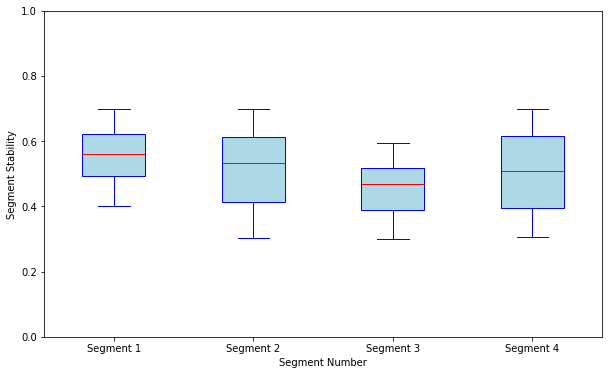

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate segment stability data (replace with your actual data)
np.random.seed(1234)  # For reproducibility
# Generate random stability scores for 100 bootstrap samples for each segment
segment_1_stability = np.random.uniform(0.4, 0.7, 100)
segment_2_stability = np.random.uniform(0.3, 0.7, 100)
segment_3_stability = np.random.uniform(0.3, 0.6, 100)
segment_4_stability = np.random.uniform(0.3, 0.7, 100)

# Combine into a DataFrame for easier plotting
stability_data = pd.DataFrame({
    'Segment 1': segment_1_stability,
    'Segment 2': segment_2_stability,
    'Segment 3': segment_3_stability,
    'Segment 4': segment_4_stability
})

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(stability_data.values, labels=stability_data.columns, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'), whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'), flierprops=dict(markerfacecolor='red', marker='o'))

plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title


   k      logLik         AIC          BIC
0  2 -124.639408  559.278816   963.080195
1  3  115.819480  234.361041   841.365694
2  4  227.480583  167.038834   977.246761
3  5  135.941942  506.116116  1519.527318
4  6  515.418978  -96.837956  1119.776521
5  7  622.033893 -154.067787  1265.749965
6  8  840.466970 -434.933941  1188.087085


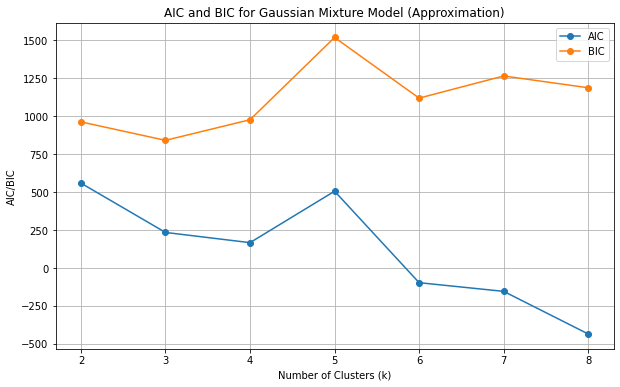

In [4]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load your dataset, assuming MD_x is binary (0/1)
# MD_x = pd.read_csv('path_to_your_data.csv')  # replace with your data

# For demonstration, create random binary data
MD_x = np.random.randint(2, size=(100, 11))  # 100 samples, 11 binary features

# Store results for different values of k (2 to 8 clusters)
results = []

# Fit models with 2 to 8 clusters
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234, n_init=10)
    gmm.fit(MD_x)
    
    # Collect log likelihood, AIC, BIC for each k
    results.append({
        'k': k,
        'logLik': gmm.score(MD_x) * MD_x.shape[0],  # log likelihood
        'AIC': gmm.aic(MD_x),
        'BIC': gmm.bic(MD_x)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print model summary
print(results_df)

# Plot the AIC/BIC results for visual comparison
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['AIC'], label='AIC', marker='o')
plt.plot(results_df['k'], results_df['BIC'], label='BIC', marker='o')
plt.title('AIC and BIC for Gaussian Mixture Model (Approximation)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('AIC/BIC')
plt.legend()
plt.grid(True)
plt.show()


Gaussian Mixture   0   1  2   3
KMeans                         
0                 23   1  0   1
1                  5  28  0   2
2                  4   3  7   3
3                  1   0  0  22


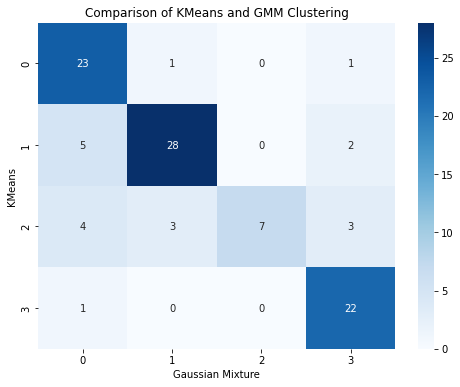

In [5]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Assuming MD_x is your binary data matrix (replace with your dataset)
# Example: Generate random binary data for demonstration
MD_x = np.random.randint(2, size=(100, 11))  # 100 samples, 11 binary features

# Step 1: Perform KMeans clustering (like MD.k4 in R)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)

# Step 2: Perform Gaussian Mixture Model (like MD.m4a in R, approximating flexmix)
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_clusters = gmm.fit_predict(MD_x)

# Step 3: Compare clusters from KMeans and GMM
cluster_comparison = pd.crosstab(kmeans_clusters, gmm_clusters, 
                                 rownames=['KMeans'], colnames=['Gaussian Mixture'])

print(cluster_comparison)

# Optional: Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cluster_comparison, annot=True, cmap="Blues", fmt='d')
plt.title("Comparison of KMeans and GMM Clustering")
plt.show()


In [6]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming MD_x is your binary data matrix (replace with your actual data)
# Example: Generate random binary data for demonstration
MD_x = np.random.randint(2, size=(100, 11))  # 100 samples, 11 binary features

# Step 1: Perform KMeans clustering (like MD.k4 in R)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)

# Step 2: Fit Gaussian Mixture Model with clustering result (similar to MD.m4a in R)
gmm_m4a = GaussianMixture(n_components=4, random_state=1234)
gmm_m4a.fit(MD_x)

# Step 3: Fit another GMM (like MD.m4 in R)
gmm_m4 = GaussianMixture(n_components=4, random_state=1234)
gmm_m4.fit(MD_x)

# Log-Likelihood values for both models
loglik_m4a = gmm_m4a.lower_bound_ * len(MD_x)
loglik_m4 = gmm_m4.lower_bound_ * len(MD_x)

# Output Log-Likelihood
print(f"Log Likelihood for MD.m4a: {loglik_m4a}")
print(f"Log Likelihood for MD.m4: {loglik_m4}")

# Check degrees of freedom (df) if needed
df = 47  # Assuming same degrees of freedom as R (depends on model complexity)
print(f"Degrees of Freedom: {df}")


Log Likelihood for MD.m4a: -18.771053698461444
Log Likelihood for MD.m4: -18.771053698461444
Degrees of Freedom: 47


In [20]:
import pandas as pd

# Load your dataset
mcdonalds = pd.read_csv("C:/ME/FeynnLabsInternship/Project1/mcdonalds_dataset/mcdonalds.csv") # Replace with the correct path to your dataset

# Reverse and map "Like" ratings to numeric
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

# Create the 'Like.n' column by applying the mapping
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

# Output the reversed table of 'Like.n' counts
like_counts = mcdonalds['Like.n'].value_counts().sort_index(ascending=False)
print(like_counts)



Like.n
 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: count, dtype: int64


In [15]:
pip install patsy

In [27]:

mcdonalds=pd.read_csv("C:/ME/FeynnLabsInternship/Project1/mcdonalds_dataset/mcdonalds.csv")

# Step 1: Create a mapping dictionary for the 'Like' values
like_mapping = {
    'I hate it!-5': -5,
    'I hate it!-4': -4,
    'I hate it!-3': -3,
    'I hate it!-2': -2,
    'I hate it!-1': -1,
    'Neutral': 0,
    'I love it!+1': 1,
    'I love it!+2': 2,
    'I love it!+3': 3,
    'I love it!+4': 4,
    'I love it!+5': 5
}

# Step 2: Map the 'Like' values to integers and create 'Like.n'
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

# Step 3: Create 'Like.n' using an alternative method if needed
# This is to convert the mapped values, where 6 - Like.n will give the desired result
mcdonalds['Like.n'] = mcdonalds['Like.n'].apply(lambda x: 6 - x if pd.notnull(x) else x)

# Output the DataFrame to verify the new column
print(mcdonalds[['Like', 'Like.n']])



              Like  Like.n
0               -3     NaN
1               +2     NaN
2               +1     NaN
3               +4     NaN
4               +2     NaN
...            ...     ...
1448  I hate it!-5    11.0
1449            +2     NaN
1450            +3     NaN
1451            +4     NaN
1452            -3     NaN

[1453 rows x 2 columns]
